<div style="text-align: center;">
    <span style="font-family: Arial; font-size:3em; color: black;">PHYS 408A Final Project: Visualizing All The Poles!</span><br>
    <span style="font-family: Arial; font-size:1em; color: black;">Anne Whelan</span>
</div>

<div style="text-align: center;">
    <span style="font-family: Arial; font-size:2em; color: black;"> 2-Dimensional Monopole and Dipole Simulation </span><br>
</div>

<div>
    <span style="font-family: Arial; font-size:1em; color: black; line-height: 1;"> In visualizing a monopole (a point charge) 2-dimensionally, I used Coloumb's law and some geometry. First I declared an electric field function, which takes in x, y (which represents the coordinates in space of where we want to calculate the electric field), and q (the magnitude of the electric charge) parameters.<br><br>
    E_x represents the x-component of the electric field from the point charge, and E_y represents the y-component. Using Coloumb's law, which states that the magnitude of the electric force between two point charges is directly proportional to the square of the distance between them, I was able to create my E_x and E_y. 
    <br><br>
    r_1 represents the distance of the point charge to the point (x, y). 
    <br><br>
    The electric field E due to a single point charge: </span>
</div>

$$ \Large \vec{E} = \frac{1}{4 \pi \varepsilon_0} \frac{q}{r^2} \hat{r} $$



<div>
    <span style="font-family: Arial; font-size:1em; color: black; line-height: 2;"> A reminder about the r vector:  </span> 
</div>

$$
\Large \hat{r} = \frac{x}{\sqrt{x^2 + y^2}} \hat{i} + \frac{y}{\sqrt{x^2 + y^2}} \hat{j}
$$


<div>
    <span style="font-family: Arial; font-size:1em; color: black; line-height: 2;"> Which we can substitute r1 into the equation:  </span> 
</div>

$$
\Large \hat{r} = \frac{x}{r_1} \hat{i} + \frac{y}{r_1} \hat{j}
$$

<div>
    <span style="font-family: Arial; font-size:1em; color: black; line-height: 2;"> Rewriting the x/y components of E we would have:  </span> 
</div>

$$
E_x = q \cdot \frac{1}{4 \pi \varepsilon_0} \cdot \frac{1}{r_1^2} \frac{x}{r_1} \qquad E_y = q \cdot \frac{1}{4 \pi \varepsilon_0} \cdot \frac{1}{r_1^2} \frac{x}{r_1}
$$



In [74]:
import numpy as np
import matplotlib.pyplot as plt
# Coulomb's constant (in N m^2/C^2)
k = 8.9875517873681764e9

# Definition of the function to calculate the electric field of an electric dipole
def electric_field(x, y, q):
    r1 = np.sqrt(x**2 + y**2)
    E_x = q * k * (x/r1**3)
    E_y = q * k * (y/r1**3)
    
    return E_x, E_y

<div>
    <span style="font-family: Arial; font-size:1em; color: black; line-height: 2;"> Creating the plot of the graph and calculating the electric field vector at every point in the graph: </span> 
</div>

In [75]:
# Creates an array of 20 evenly spaced points between -2 and 2 along the x-axis
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)

# Calculate the electric field at each point
# Charge of q
q = 1

# At every point in the graph (x, y), we're going to input the point into the electric_field function
X, Y = np.meshgrid(x, y)
E_x, E_y = electric_field(X, Y, q)


<div>
    <span style="font-family: Arial; font-size:1em; color: black; line-height: 2;"> Normalizing the electric field so that the vector lines are the same: </span> 
</div>

(-2.0, 2.0)

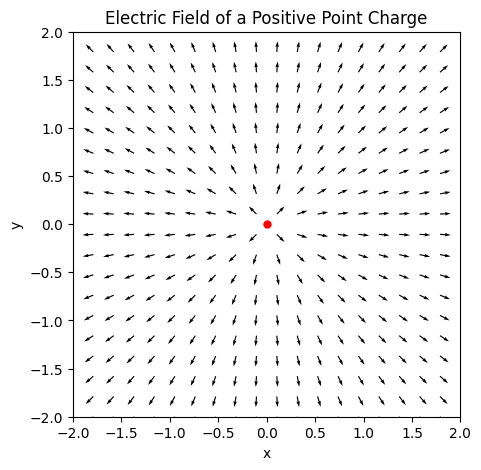

In [76]:
# Normalizing the electric field by dividing each vector by it's magnitude 
magnitude = np.sqrt(E_x**2 + E_y**2)
E_x_normalized = E_x / magnitude
E_y_normalized = E_y / magnitude

# Initialize the plot
plt.figure(figsize=(5, 5))

# Plot the normalized electric field
plt.quiver(X, Y, E_x_normalized, E_y_normalized, color='black')

# Mark the position of the point charge

if q < 0 : 
    # blue dot for negative charge 
    plt.plot(0, 0, "bo", markersize=5) 
    plt.title('Electric Field of a Negative Point Charge') 
else : 
    # red dot for positive charge
    plt.plot(0, 0, "ro", markersize=5)
    plt.title('Electric Field of a Positive Point Charge')
 
# Set plot details
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

<div>
    <span style="font-family: Arial; font-size:1em; color: black; line-height: 2;"> Now for the dipole, imagine two point charges (+q and -q), a distance d apart. The dipole is aligned on the x-axis with a negative charge at (-d/2, 0) and a positive charge at (d/2, 0). <br><br> We know that the electric field is the vector sum of the fields due to each of their charges. </span> 
</div>

$$ \Large \vec{E} = \frac{1}{4 \pi \varepsilon_0} \frac{q}{r^2} \hat{r} $$

$$ E_x = \frac{1}{4\pi\epsilon_0} q \left( \frac{x - \frac{d}{2}}{\left[\left(x - \frac{d}{2}\right)^2 + y^2\right]^{3/2}} - \frac{x + \frac{d}{2}}{\left[\left(x + \frac{d}{2}\right)^2 + y^2\right]^{3/2}} \right) $$


$$ E_y = \frac{1}{4\pi\epsilon_0} q \left( \frac{y}{\left[\left(x - \frac{d}{2}\right)^2 + y^2\right]^{3/2}} - \frac{y}{\left[\left(x + \frac{d}{2}\right)^2 + y^2\right]^{3/2}} \right) $$


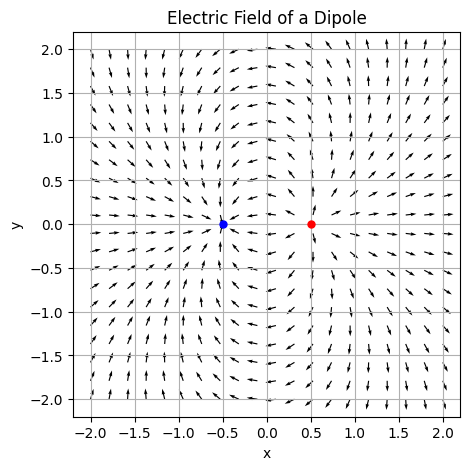

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Coulomb's constant (in N m^2/C^2)
k = 8.9875517873681764e9

# Define the function to calculate the electric field of an electric dipole
def electric_field(x, y, q, d):
    r1 = np.sqrt((x - d/2)**2 + y**2)
    r2 = np.sqrt((x + d/2)**2 + y**2)
    E_x = k * q * ((x - d/2)/r1**3 - (x + d/2)/r2**3)
    E_y = k * q * (y/r1**3 - y/r2**3)
    return E_x, E_y

# Create a grid of points
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Set the magnitude of the charge and the distance between the charges
q = 1 
d = 1 

# Calculate the electric field
Ex, Ey = electric_field(X, Y, q, d)

# Calculate the magnitude and normalize the electric field
magnitude = np.sqrt(Ex**2 + Ey**2)
Ex_normalized = Ex / magnitude
Ey_normalized = Ey / magnitude

# Plot the normalized electric field
plt.figure(figsize=(5, 5))
plt.quiver(X, Y, Ex_normalized, Ey_normalized, color='black')

# plot the dipole charges, blue for negative, red for positive 
plt.plot(d/2, 0, "ro", markersize=5)
plt.plot(-d/2, 0, "bo", markersize=5) 

plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric Field of a Dipole')
plt.grid()
plt.show()


<div style="text-align: center;">
    <span style="font-family: Arial; font-size:2em; color: black;"> 3-Dimensional Monopole and Dipole Simulation </span><br>
</div>

<div>
    <span style="font-family: Arial; font-size:1em; color: black; line-height: 2;"> Now adding a z-axis to the electric field calculation, we have:  </span> 
</div>

$$
E_x = q \cdot \frac{1}{4 \pi \varepsilon_0} \cdot \frac{1}{r_1^2} \frac{x}{r_1} \qquad E_y = q \cdot \frac{1}{4 \pi \varepsilon_0} \cdot \frac{1}{r_1^2} \frac{x}{r_1} \qquad E_z = q \cdot \frac{1}{4 \pi \varepsilon_0} \cdot \frac{1}{r_1^2} \frac{z}{r_1}
$$


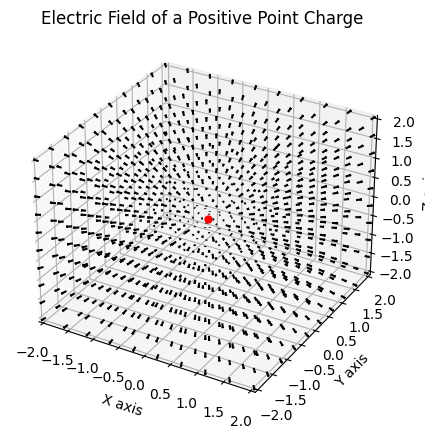

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Coulomb's constant (in N m^2/C^2)
k = 8.9875517873681764e9

# Definition of the function to calculate the electric field of a point charge
def electric_field(x, y, z, q):
    r = np.sqrt(x**2 + y**2 + z**2)
    E_x = q * k * (x/r**3)
    E_y = q * k * (y/r**3)
    E_z = q * k * (z/r**3)
    
    return E_x, E_y, E_z

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = np.linspace(-2, 2, 10)

# Charge of q
q = 1

# Calculate the electric field at each [i, j, k] point 
X, Y, Z = np.meshgrid(x, y, z)
E_x, E_y, E_z = electric_field(X, Y, Z, q)

# Normalizing the electric field by dividing each vector by its magnitude 
magnitude = np.sqrt(E_x**2 + E_y**2 + E_z**2)
E_x_normalized = E_x / magnitude
E_y_normalized = E_y / magnitude
E_z_normalized = E_z / magnitude

# Create the 3D plot
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot the normalized electric field
ax.quiver(X, Y, Z, E_x_normalized, E_y_normalized, E_z_normalized, length=0.1, normalize=True, color='black')

if q < 0:
    # blue dot for negative charge 
    plt.plot(0, 0, "bo", markersize=5)
    plt.title('Electric Field of a Negative Point Charge') 
else:
    # red dot for positive charge
    plt.plot(0, 0, "ro", markersize=5)
    plt.title('Electric Field of a Positive Point Charge')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

plt.show()

<div>
    <span style="font-family: Arial; font-size:1em; color: black; line-height: 2;"> For the dipole, we also add a z-axis to the electric field calculation, and again, we know that the electric field is the vector sum of the fields due to each of their charges. This results in:  </span> 
</div>

$$ E_x = \frac{1}{4\pi\epsilon_0} q \left( \frac{x - \frac{d}{2}}{\left[\left(x - \frac{d}{2}\right)^2 + y^2 + z^2\right]^{3/2}} - \frac{x + \frac{d}{2}}{\left[\left(x + \frac{d}{2}\right)^2 + y^2 + z^2\right]^{3/2}} \right) $$


$$ E_y = \frac{1}{4\pi\epsilon_0} q \left( \frac{y}{\left[\left(x - \frac{d}{2}\right)^2 + y^2 + z^2\right]^{3/2}} - \frac{y}{\left[\left(x + \frac{d}{2}\right)^2 + y^2 + z^2\right]^{3/2}} \right) $$

$$ E_z = \frac{1}{4\pi\epsilon_0} q \left( \frac{z}{\left[\left(x - \frac{d}{2}\right)^2 + y^2 + z^2\right]^{3/2}} - \frac{z}{\left[\left(x + \frac{d}{2}\right)^2 + y^2 + z^2\right]^{3/2}} \right) $$

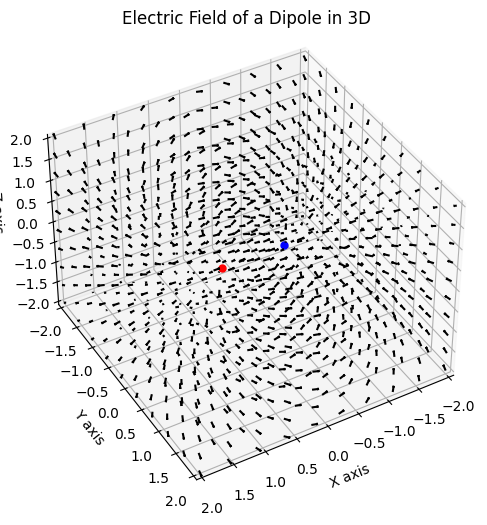

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Coulomb's constant (in N m^2/C^2)
k = 8.9875517873681764e9

# Define the function to calculate the electric field of an electric dipole
def electric_field(x, y, z, q, d):
    r1 = np.sqrt((x - d/2)**2 + y**2 + z**2)
    r2 = np.sqrt((x + d/2)**2 + y**2 + z**2)
    E_x = k * q * ((x - d/2)/r1**3 - (x + d/2)/r2**3)
    E_y = k * q * (y/r1**3 - y/r2**3)
    E_z = k * q * (z/r1**3 - z/r2**3)
    return E_x, E_y, E_z

# Create a grid of points
num_points = 10
x = np.linspace(-2, 2, num_points)
y = np.linspace(-2, 2, num_points)
z = np.linspace(-2, 2, num_points)

# for every [i,j,k] point in the grid 
X, Y, Z = np.meshgrid(x, y, z)

# The charge and the distance between the charges
q = 1  
d = 1  

# Calculate the electric field
Ex, Ey, Ez = electric_field(X, Y, Z, q, d)

# Calculate the magnitude and normalize the electric field
magnitude = np.sqrt(Ex**2 + Ey**2 + Ez**2)
Ex_normalized = Ex / magnitude
Ey_normalized = Ey / magnitude
Ez_normalized = Ez / magnitude

# Create the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the normalized electric field
ax.quiver(X, Y, Z, Ex_normalized, Ey_normalized, Ez_normalized, length=0.1, normalize=True, color='black')

# blue for negative, red for positive
plt.plot(-d/2, 0, "bo", markersize=5); 
plt.plot(d/2, 0, "ro", markersize=5); 

# labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Viewpoint to better view dipole
ax.view_init(elev=40, azim=60)  

plt.title('Electric Field of a Dipole in 3D')
plt.show()
